In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.40, random_state=0)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


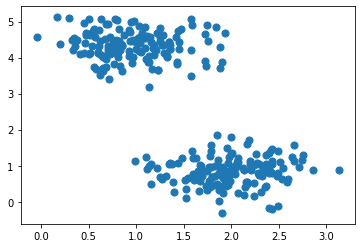

In [2]:

plt.scatter(X[:, 0], X[:, 1], s=50);
#plt.savefig('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/mL/images/SVC/slides/unclassify.png')

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

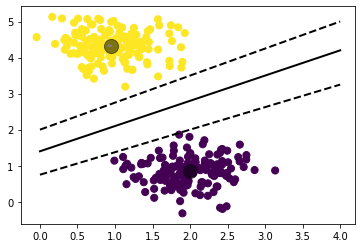

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.plot([0, 4], [1.4, 4.2], 'k-', lw=2)
plt.plot([0, 4], [.75, 3.25], 'k-', linestyle='dashed', lw=2)
plt.plot([0, 4], [2, 5], 'k-', linestyle='dashed', lw=2)
#plt.savefig('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/mL/images/SVC/slides/classify.png')

Text(0.5, 0, 'x')

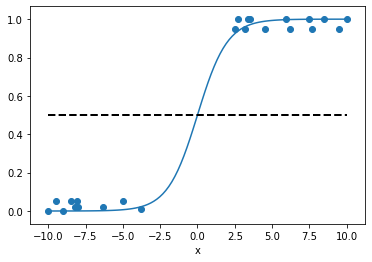

In [5]:
import math 
  
x = np.linspace(-10, 10, 100) 
z = 1/(1 + np.exp(-x)) 

X = np.array([-10,-9.5, -9, -8.5,-6.3, -3.8, -8.2, -8.1, -8, -5, 2.5, 2.7, 3.2, 
              3.4, 3.5, 4.5, 5.9, 6.2, 7.5, 7.7, 8.5, 9.5,10])
Y = np.array([0,.05,0,.05,.02,.01, .02,.05,.02,.05,.95,1,.95,1,1,.95,1,.95,1,.95,1,.95,1])
plt.plot(x, z) 
plt.plot([-10, 10], [.5, .5], 'k-', lw=2, linestyle='dashed')
plt.scatter(X,Y)
plt.xlabel("x") 
#plt.savefig('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/mL/images/SVC/slides/log.png')

In [59]:

from sklearn.datasets import make_regression
from matplotlib import pyplot
from pandas import DataFrame
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=24,tail_strength=1)
                      


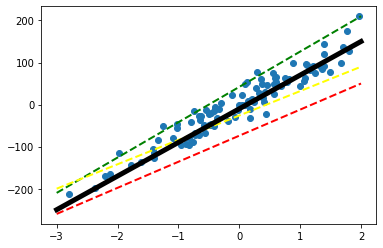

In [75]:
plt.scatter(X,y)
plt.plot([-3, 2], [-210, 210], 'k-', lw=2, linestyle='dashed', color='green')
plt.plot([-3, 2], [-260, 50], 'k-', lw=2, linestyle='dashed', color='red')
plt.plot([-3, 2], [-200, 90], 'k-', lw=2, linestyle='dashed', color='yellow')
plt.plot([-3, 2], [-250, 150], 'k-', lw=5)
plt.savefig('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/mL/images/SVC/slides/ridge.png')

In [9]:
import matplotlib.pyplot as plt
import sys
import os
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
outDir = thisDir + 'output/mL/'

df=pd.read_csv(outDir+'results/SVC/acc/CV/acc.csv')
df= pd.melt(df, value_vars=['mixed','motor','mem'], var_name='task', value_name='acc')

In [10]:
df.head()

,task,acc
0,mixed,0.95
1,mixed,0.95
2,mixed,1.00
3,mixed,1.00
4,mixed,1.00


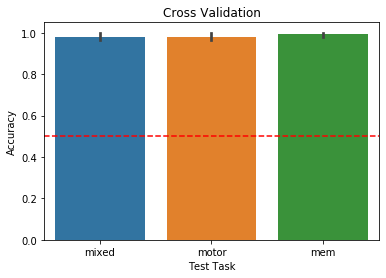

In [16]:
ax=sns.barplot(x='task', y='acc', data=df)
ax.axhline(.50, ls='--', color='r')
ax.set_title('Cross Validation')
ax.set_xlabel('Test Task')
ax.set_ylabel('Accuracy')
plt.savefig(outDir +'images/SVC/slides/CV_boxplot.png', bbox_inches='tight')

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/mL/'
import results


import pandas as pd
df=pd.read_csv(outDir+'results/ridge/acc/DS/acc.csv', usecols=[1,2,3,4])
#df.set_index('task', inplace=True)
#df.rename(index={'mixed':'Mixed','motor':'Motor','mem':'Memory'}, inplace=True)
#df.reset_index(inplace=True)

subject by subject heatmap


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


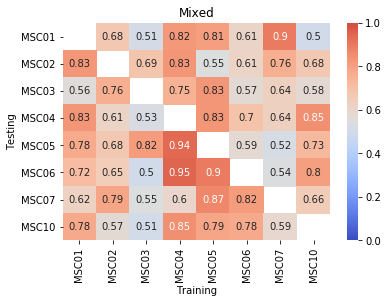

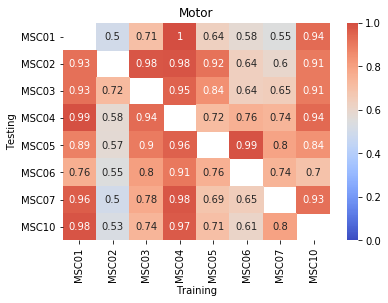

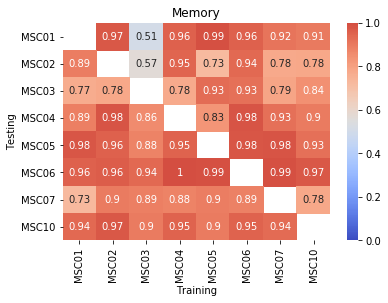

In [2]:

#results.heatmaps('ridge', 'SS')
#results.boxACC(finalDF, 'ridge', 'CV')
#results.boxACC(df, 'ridge', 'DS')
results.plotACC(df, 'ridge', 'DS')

In [43]:
import numpy as np
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/mL/results/ridge/acc/'

#analysis=['DS','CV','BS','SS']
taskList=['mixed','mem','motor']
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']

motor=pd.DataFrame()
mixed=pd.DataFrame()
mem=pd.DataFrame()
#DS
for train in subList:
    for test in subList:
        if train==test:
            continue
        #motor
        tmpmotor=pd.read_csv(outDir+'DS/folds/'+train+test+'motor.csv',usecols=[1,2,3])
        motor=pd.concat([motor,tmpmotor])
        #mixed
        tmpmix=pd.read_csv(outDir+'DS/folds/'+train+test+'mixed.csv',usecols=[1,2,3])
        mixed=pd.concat([mixed,tmpmix])
        #mem
        tmpmem=pd.read_csv(outDir+'DS/folds/'+train+test+'mem.csv',usecols=[1,2,3])
        mem=pd.concat([mem,tmpmem])
        
motMix=pd.merge(motor,mixed,on=['train', 'test'])        
DS=pd.merge(motMix,mem,on=['train', 'test'])   
DS.rename(columns={'mixed':'Mixed','motor':'Motor','mem':'Memory'}, inplace=True)

In [44]:
DS.drop(columns={'train','test'},inplace=True)
DS_violin=pd.melt(DS, value_vars=['Motor','Mixed','Memory'], var_name='task', value_name='acc')
DS_violin['Analysis']='Diff Sub'

In [6]:

taskList=['mixed','mem','motor']
def refine_acc(sub):
    sub_tmp=pd.DataFrame()
    for train in taskList:
        for test in taskList:
            if train==test:
                continue
            tmp=pd.read_csv(outDir+'BS/folds/'+train+test+sub+'.csv',usecols=[1,2,3])
            sub_tmp=pd.concat([sub_tmp,tmp])
    #return sub_tmp
    sub_tmp.to_csv(outDir+'BS/folds/'+sub+'.csv', index=False)

In [7]:
#SS
BS=refine_acc('MSC01')
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
for sub in subList:
    refine_acc(sub)
    #SS=pd.merge(SS,tmp, on=['train','test'])


FileNotFoundError: [Errno 2] File /Users/Alexis/Desktop/MSC_Alexis/analysis/output/mL/results/ridge/acc/BS/folds/mixedmemMSC01.csv does not exist: '/Users/Alexis/Desktop/MSC_Alexis/analysis/output/mL/results/ridge/acc/BS/folds/mixedmemMSC01.csv'

In [1]:
import numpy as np
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/mL/results/ridge/acc/'

In [2]:
t1=pd.read_csv(outDir+'SS/folds/MSC1_2.csv')
t2=pd.read_csv(outDir+'SS/folds/MSC3_4.csv')
t3=pd.read_csv(outDir+'SS/folds/MSC5_6.csv')
t4=pd.read_csv(outDir+'SS/folds/MSC7_10.csv')

In [3]:
t5=pd.merge(t1,t2, on=['train','test'])
t6=pd.merge(t3,t4,  on=['train','test'])

In [5]:
t5.to_csv(outDir+'SS/folds/half1.csv', index=False)
t6.to_csv(outDir+'SS/folds/half2.csv', index=False)

In [ ]:
results=pd.merge(t5, t6,  on=['train','test'])

In [1]:
MSC01=pd.read_csv(outDir+'SS/folds/MSC01.csv')
MSC02=pd.read_csv(outDir+'SS/folds/MSC02.csv')
MSC03=pd.read_csv(outDir+'SS/folds/MSC03.csv')
MSC04=pd.read_csv(outDir+'SS/folds/MSC04.csv')
MSC05=pd.read_csv(outDir+'SS/folds/MSC05.csv')
MSC06=pd.read_csv(outDir+'SS/folds/MSC06.csv')
MSC07=pd.read_csv(outDir+'SS/folds/MSC07.csv')
MSC10=pd.read_csv(outDir+'SS/folds/MSC10.csv')
SS=pd.merge(MSC01, MSC02, on=['train','test'])

In [3]:
SS.to_csv(outDir+'SS/folds/MSC1_2.csv', index=False)

In [4]:
SS1=pd.merge(MSC03, MSC04, on=['train','test'])

In [5]:
SS1.to_csv(outDir+'SS/folds/MSC3_4.csv', index=False)

In [6]:
SS3=pd.merge(MSC05,MSC06, on=['train','test'])

In [7]:
SS3.to_csv(outDir+'SS/folds/MSC5_6.csv', index=False)

In [9]:
SS5=pd.merge(MSC07, MSC10, on=['train','test'])

In [10]:
SS5.to_csv(outDir+'SS/folds/MSC7_10.csv', index=False)

In [11]:
SS1_3=pd.merge(SS1, SS3, on=['train','test'])

In [13]:
SS1_3_4=pd.merge(SS, SS1_3, on=['train','test'])

In [ ]:
final=pd.merge(SS1_3_4, SS5, on=['train','test'])

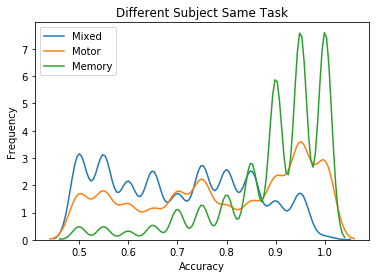

In [125]:
fig, ax=plt.subplots()

ax=sns.kdeplot(DS['mixed'],label='Mixed')#, shade=True, linewidth=2.5,  color='#DCEDC8')#, alpha=.5)
ax=sns.kdeplot(DS['motor'],label='Motor')#, shade=True, linewidth=2.5, color='#42B3D5')#, alpha=.5)
ax=sns.kdeplot(DS['mem'],label='Memory')#, shade=True, linewidth=2.5,color='#1A237E')#, alpha=.2)
ax.legend()
ax.set_title('Different Subject Same Task')
ax.set_ylabel('Frequency')
ax.set_xlabel('Accuracy')
fig=ax.get_figure()
#plt.savefig(thisDir +'output/mL/images/ridge/acc/DS/kdeplot.png', bbox_inches='tight')



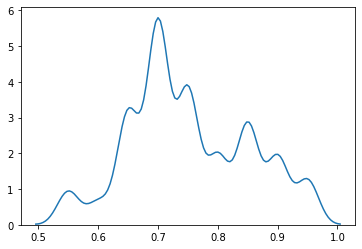

In [53]:
sns.kdeplot(DS[DS.train=='MSC05'].motor.values)

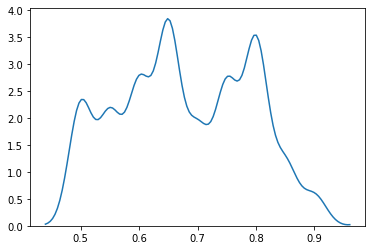

In [51]:
sns.kdeplot(DS[DS.train=='MSC02'].mixed.values)

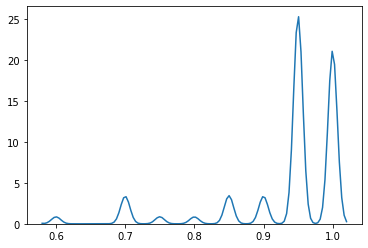

In [52]:
sns.kdeplot(DS[DS.train=='MSC02'].mem.values)

In [7]:
DS_train=DS.drop(columns='test')

In [33]:
df=pd.melt(DS_train, id_vars='train',value_vars=['motor','mixed','mem'], var_name='task')
#df.set_index('task', inplace=True)

In [31]:
df.pivot_table(index='task',columns='train', values='value')

train,MSC01,MSC02,MSC03,MSC04,MSC05,MSC06,MSC07,MSC10
task,,,,,,,,
mem,0.880714,0.935000,0.792857,0.925000,0.896429,0.947143,0.903571,0.874286
mixed,0.732143,0.677857,0.586429,0.822857,0.798571,0.668571,0.655714,0.685000
motor,0.920000,0.565714,0.834286,0.965714,0.751429,0.695000,0.696429,0.878571


In [45]:
CV=pd.read_csv(outDir+'CV/reformedFolds.csv')

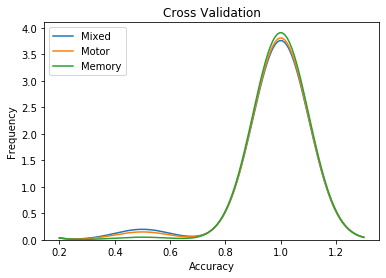

In [126]:
fig, ax=plt.subplots()
ax=sns.kdeplot(CV[CV.task=='Mixed'].acc.values,label='Mixed', bw=.1)
ax=sns.kdeplot(CV[CV.task=='Motor'].acc.values,label='Motor', bw=.1)
ax=sns.kdeplot(CV[CV.task=='Memory'].acc.values,label='Memory', bw=.1)

ax.set_title('Cross Validation')
ax.set_ylabel('Frequency')
ax.set_xlabel('Accuracy')
fig=ax.get_figure()
plt.savefig(thisDir +'output/mL/images/ridge/acc/CV/kdeplot.png', bbox_inches='tight')

In [46]:
CV.drop(columns='sub', inplace=True)
CV['Analysis']='Same Sub'
frames=[DS_violin, CV]
result=pd.concat(frames)

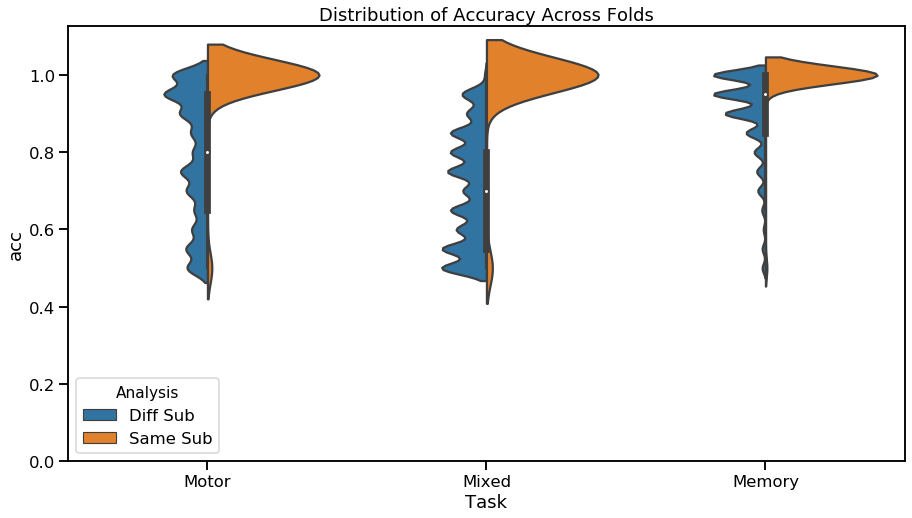

In [55]:
sns.set_context('talk')
plt.figure(figsize=(15,8))
g=sns.violinplot(x='task', y='acc', hue='Analysis', data=result, split=True)
g.set_xlabel('Task')
g.set(ylim=(0))
g.set_title('Distribution of Accuracy Across Folds')
plt.savefig(thisDir +'output/mL/images/ridge/acc/CV/violinplots.png', bbox_inches='tight')

In [33]:
SS.head()

,MSC01,train,MSC02,MSC03,MSC04,MSC05,MSC06,MSC07,MSC10
0,0.8,mixed,0.85,0.8,0.95,1.0,1.0,0.9,1.00
1,0.8,mixed,0.85,0.8,0.95,1.0,1.0,0.9,0.95
2,0.8,mixed,0.85,0.8,0.95,1.0,1.0,0.9,1.00
3,0.8,mixed,0.85,0.8,0.95,1.0,1.0,0.9,1.00
4,0.8,mixed,0.85,0.8,0.95,1.0,1.0,0.9,0.95


([<matplotlib.axis.XTick at 0x7fe6242384d0>,
 <a list of 6 Text xticklabel objects>)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


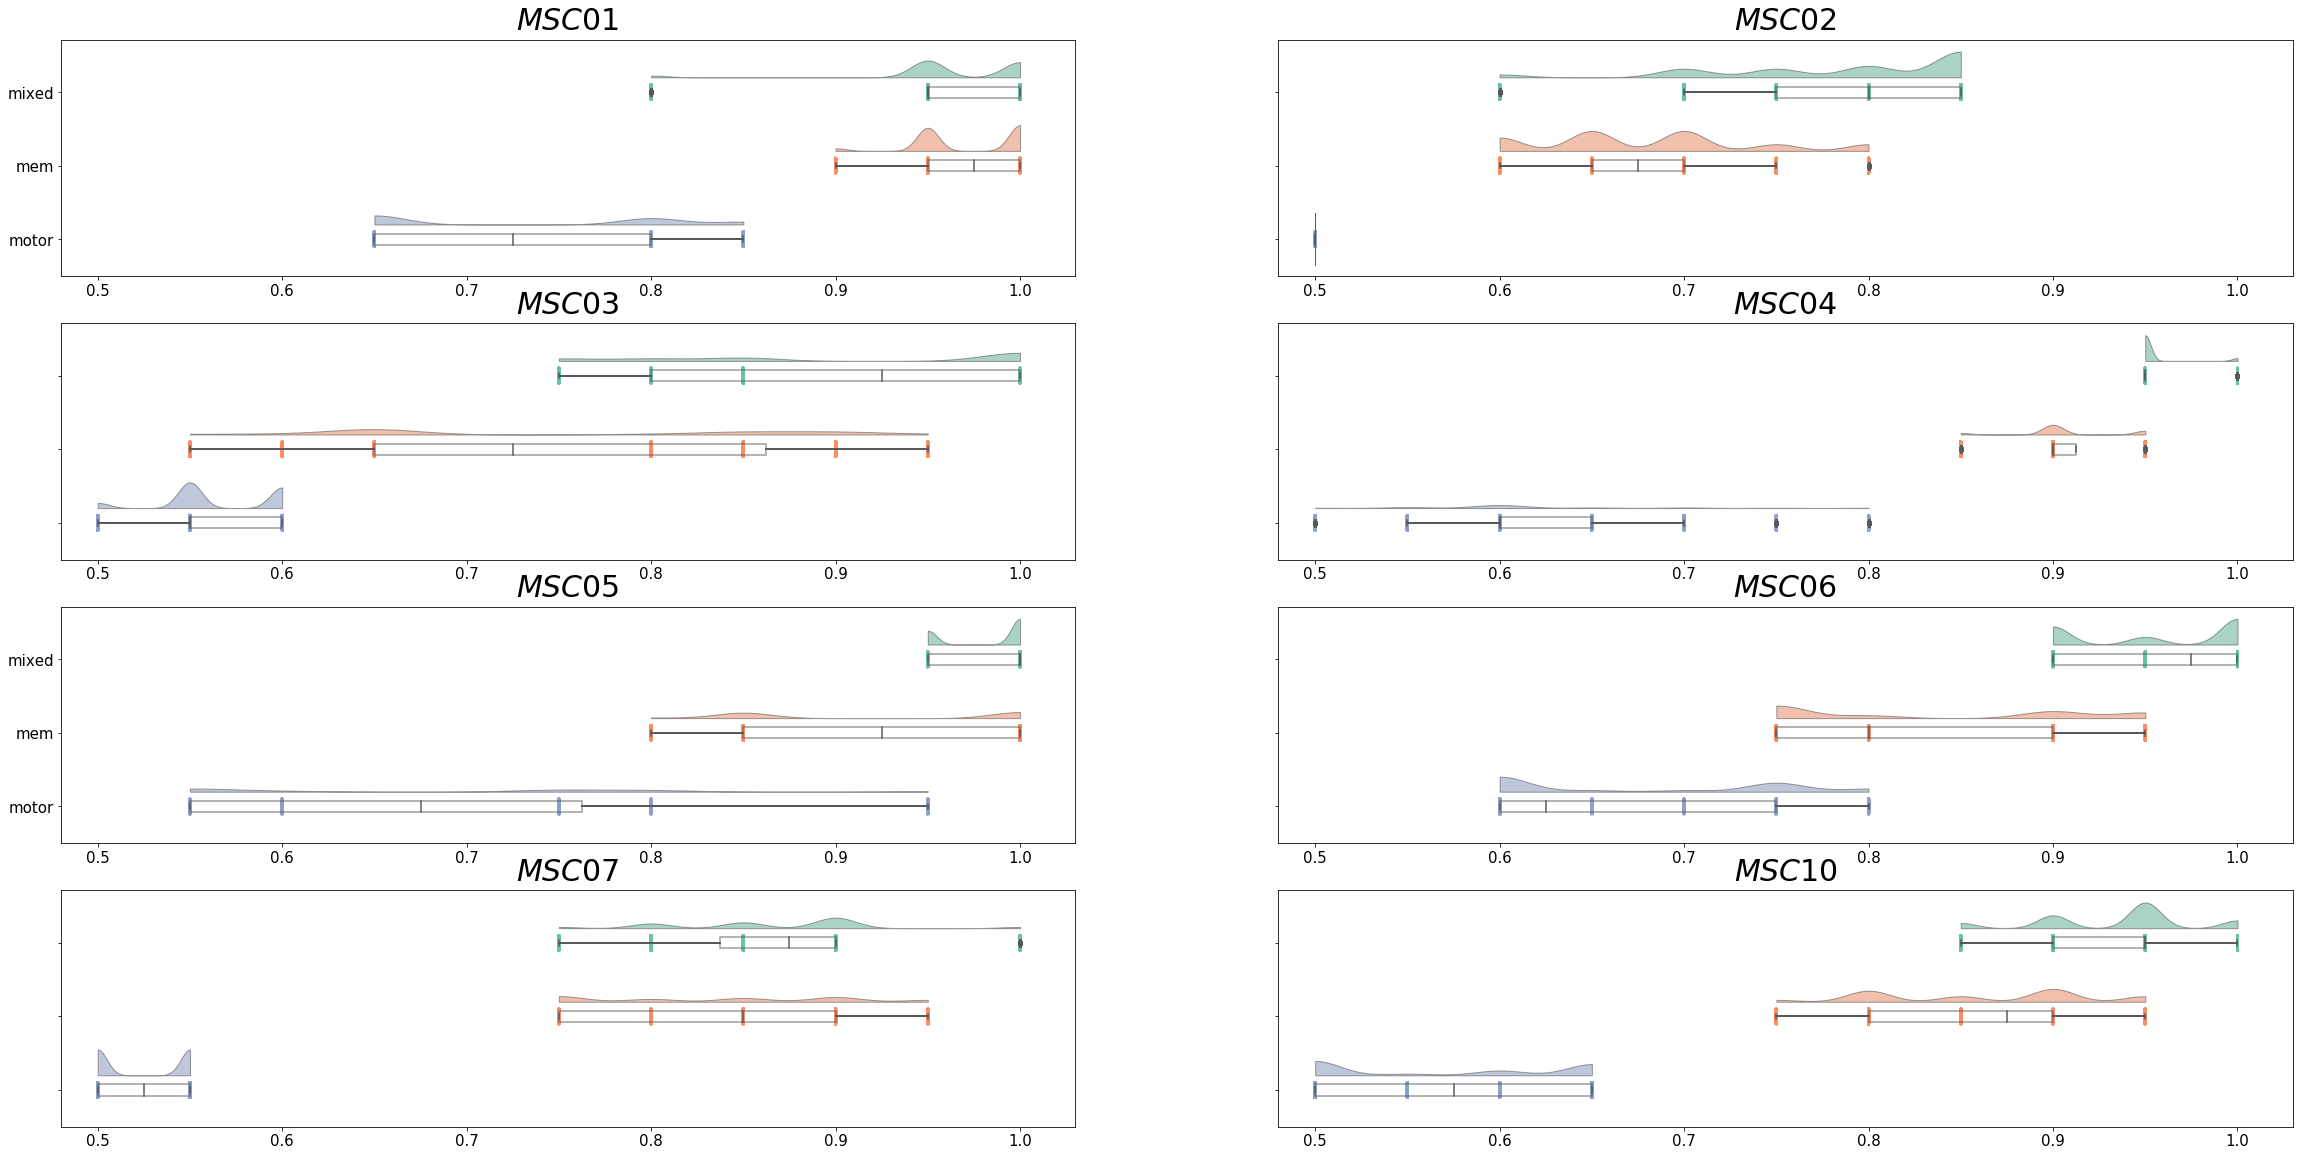

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ptitprince as pt
%matplotlib inline
import os
import sys
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/mL/results/ridge/acc/'
#SS
SS=pd.read_csv(outDir+'SS/folds/allFolds.csv')
SS.drop(columns='test', inplace=True)
#Create figure space
fig=plt.figure(figsize=(40,20), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 4 columns
#gs = gridspec.GridSpec(nrows=2, ncols=4)
gs = gridspec.GridSpec(nrows=4, ncols=2)
#MSC01
ax1=fig.add_subplot(gs[0,0])
dx='train'; dy='MSC01'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax1)
ax.tick_params(labelsize=15)
ax.set_title('$MSC01$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC02
ax2=fig.add_subplot(gs[0,1], sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
dx='train'; dy='MSC02'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax2)
ax.tick_params(labelsize=15)
ax.set_title('$MSC02$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC03
#ax3=fig.add_subplot(gs[0,2], sharey=ax1)
ax3=fig.add_subplot(gs[1,0], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False)
dx='train'; dy='MSC03'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax3)
ax.tick_params(labelsize=15)
ax.set_title('$MSC03$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC04
#ax4=fig.add_subplot(gs[0,3], sharey=ax1)
ax4=fig.add_subplot(gs[1,1], sharey=ax1)
plt.setp(ax4.get_yticklabels(), visible=False)
dx='train'; dy='MSC04'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax4)
ax.tick_params(labelsize=15)
ax.set_title('$MSC04$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)


#MSC05
#ax5=fig.add_subplot(gs[1,0])
ax5=fig.add_subplot(gs[2,0])
dx='train'; dy='MSC05'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax5)
ax.tick_params(labelsize=15)
ax.set_title('$MSC05$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC06
#ax6=fig.add_subplot(gs[1,1], sharey=ax5)
ax6=fig.add_subplot(gs[2,1], sharey=ax5)
plt.setp(ax6.get_yticklabels(), visible=False)
dx='train'; dy='MSC06'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax6)
ax.tick_params(labelsize=15)
ax.set_title('$MSC06$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC07
#ax7=fig.add_subplot(gs[1,2], sharey=ax5)
ax7=fig.add_subplot(gs[3,0], sharey=ax5)
plt.setp(ax7.get_yticklabels(), visible=False)
dx='train'; dy='MSC07'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax7)
ax.tick_params(labelsize=15)
ax.set_title('$MSC07$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)

#MSC10
#ax8=fig.add_subplot(gs[1,3], sharey=ax5)
ax8=fig.add_subplot(gs[3,1], sharey=ax5)
plt.setp(ax8.get_yticklabels(), visible=False)
dx='train'; dy='MSC10'; dhue='train'; ort='h'; pal='Set2'; sigma=.2
ax=pt.RainCloud(x=dx, y = dy, data = SS, bw = sigma,
                 width_viol = .7, alpha = .6, orient='h', dodge = True, ax=ax8)
ax.tick_params(labelsize=15)
ax.set_title('$MSC10$', fontsize=30, pad=10)
plt.ylabel('')
ax.set(xlabel=' ')
ax.set(xlim=(.48, 1.03))
x=[.5,.6,.7,.8,.9,1.0]
plt.xticks(x)



#plt.savefig(outDir+'output/mL/images/ridge/acc/SS/raincloud_plots..png', bbox_inches='tight')

In [26]:
df=pd.read_csv(outDir+'SS/acc.csv')

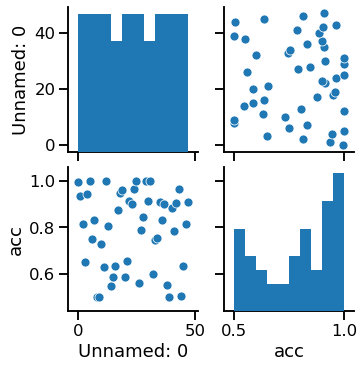

In [32]:
sns.pairplot(df)

In [34]:
df

,Unnamed: 0,train_task,test_task,sub,acc
0,0,mixed,motor,MSC01,0.995
1,1,mixed,mem,MSC01,0.935
2,2,motor,mixed,MSC01,0.815
3,3,motor,mem,MSC01,0.650
4,4,mem,mixed,MSC01,0.945
5,5,mem,motor,MSC01,1.000
6,6,mixed,motor,MSC02,0.750
7,7,mixed,mem,MSC02,0.830
8,8,motor,mixed,MSC02,0.500
9,9,motor,mem,MSC02,0.500


In [ ]:
df.pivot()